In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt #靜態展示

import plotly.express as px#動態展示

In [ ]:
import plotly.express as px #動態

In [ ]:
sns.get_dataset_names() #可以取得內建資料集的名稱

In [ ]:
tips_ds = sns.load_dataset('tips') # seaborn內建資料集
tips_ds

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Scatterplot(散布圖)

<Axes: xlabel='total_bill', ylabel='tip'>

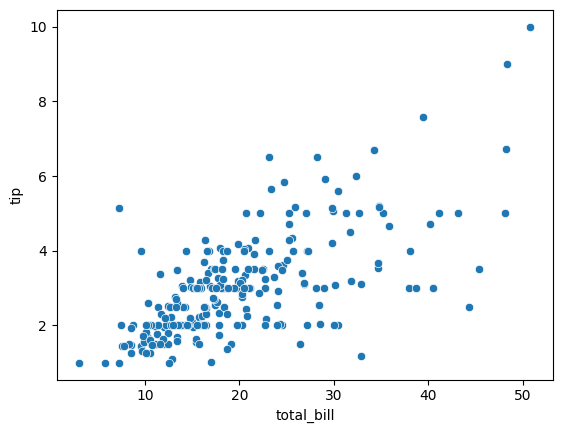

In [ ]:
sns.scatterplot(tips_ds, x='total_bill', y='tip') #scatterplot(整個表格, X軸(欄位名稱), Y軸(欄位名稱))

# regplot(迴歸線)

<Axes: xlabel='total_bill', ylabel='tip'>

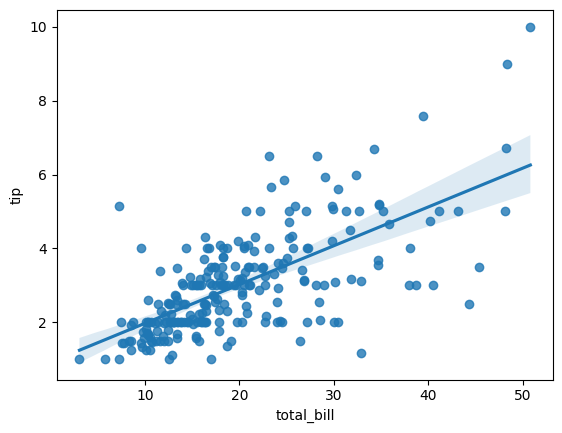

In [ ]:
sns.regplot(tips_ds, x='total_bill', y='tip') #迴歸線

# barplot(直線圖)

<Axes: xlabel='sex', ylabel='tip'>

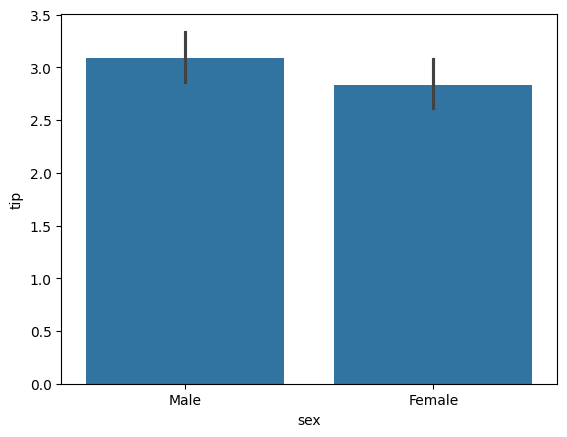

In [ ]:
sns.barplot(tips_ds, x='sex', y='tip') #長條圖

# subplot(多個子圖)以及分類

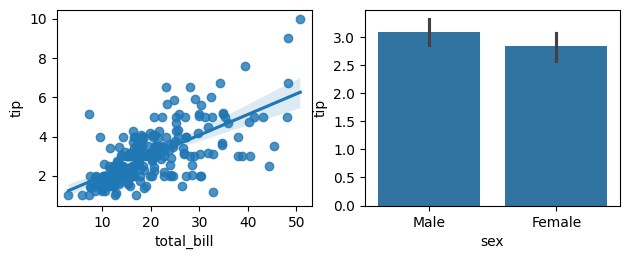

In [ ]:
plt.subplot(2, 2, 1) #子圖表 subplot(列, 欄, 幾號位(從左到右,從上到下[1開始]))
sns.regplot(tips_ds, x='total_bill', y='tip')
plt.subplot(2, 2, 2)
sns.barplot(tips_ds, x='sex', y='tip')
plt.tight_layout() #排版
plt.show() #指定完表格位子後要展示出來

<ipython-input-15-a4dbb9ea7093>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, sub_df in tips_ds.groupby('smoker'):


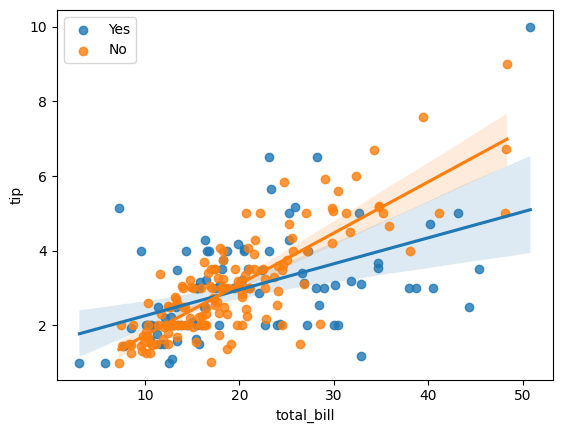

In [ ]:
for name, sub_df in tips_ds.groupby('smoker'):
  sns.regplot(sub_df, x='total_bill', y='tip', label=name) #標籤

plt.legend() #圖例(左上角的yes跟no)
plt.show()

# 飲水機位置

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32239 (\N{CJK UNIFIED IDEOGRAPH-7DEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32147 (\N{CJK UNIFIED IDEOGRAPH-7D93}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26283 (\N{CJK UNIFIED IDEOGRAPH-66AB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20572 (\N{CJK UNIFIED IDEOGRAPH-505C}) missing from font(s) DejaVu Sans.
  fig.canvas

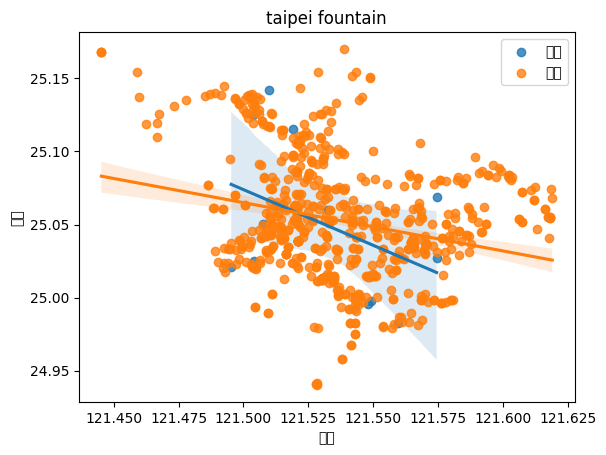

In [5]:
#飲水機位置範例
fountain_url = "https://data.taipei/api/frontstage/tpeod/dataset/resource.download?rid=181097e0-c171-4bcd-ad41-c7b55dbc616e"
fountain_df = pd.read_csv(fountain_url, encoding='Big5')#編碼
#fountain_df.head()
for name, sub_df in fountain_df.groupby('狀態'):
  sns.regplot(sub_df, x='經度', y='緯度', label=name)
#sns.regplot(fountain_df, x='經度', y='緯度')
plt.title("taipei fountain")
plt.legend()
plt.show()

## 讓表格顯示中文

In [18]:
# 安裝 Noto 字型
!apt-get -y install fonts-noto-cjk

# 匯入套件
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 找出安裝後的中文字型檔案位置
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'  # ✅ Google Colab 安裝後的字型位置

# 設定 matplotlib 使用這個字型
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


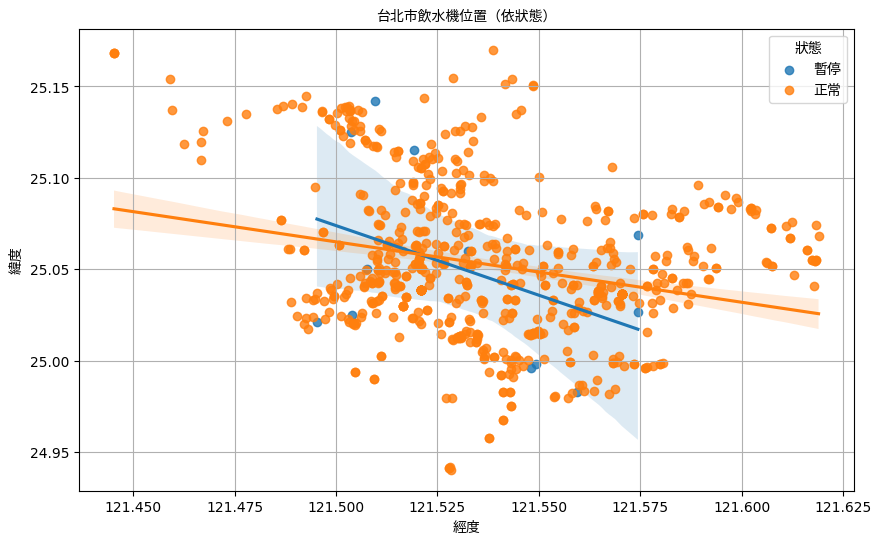

In [21]:
fountain_url = "https://data.taipei/api/frontstage/tpeod/dataset/resource.download?rid=181097e0-c171-4bcd-ad41-c7b55dbc616e"
fountain_df = pd.read_csv(fountain_url, encoding='Big5')

# 畫圖（繁體中文都加 font_prop）
plt.figure(figsize=(10, 6))
for name, sub_df in fountain_df.groupby('狀態'):
    sns.regplot(data=sub_df, x='經度', y='緯度', label=name, scatter=True)

plt.title("台北市飲水機位置（依狀態）", fontproperties=font_prop)
plt.xlabel("經度", fontproperties=font_prop)
plt.ylabel("緯度", fontproperties=font_prop)
#plt.legend(title='狀態', prop=font_prop)
legend = plt.legend(title='狀態', prop=font_prop)        # 設定每個 label 的字型
legend.get_title().set_fontproperties(font_prop)
plt.grid(True)
plt.show()

# 老師解答

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32239 (\N{CJK UNIFIED IDEOGRAPH-7DEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32147 (\N{CJK UNIFIED IDEOGRAPH-7D93}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas

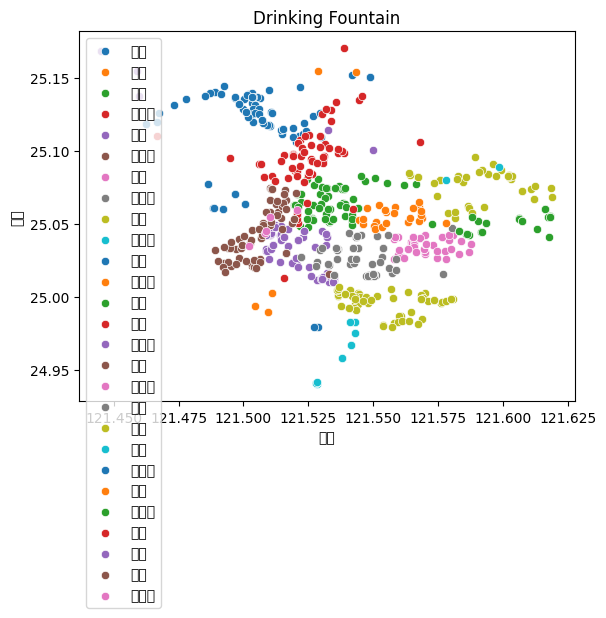

In [23]:
#老師解答
plt.title('Drinking Fountain')
for name, sub_df in fountain_df.groupby('行政區'):
  sns.scatterplot(sub_df, x='經度', y='緯度', label=name)

plt.legend()
plt.show()

# plotly(seaborn無法顯示地圖)

In [24]:
def get_ord(num):
  try:
    num_list = ['<1', '1']
    num_dict = {num: (idx*0.4 + 0.4) for idx, num in enumerate(num_list)}
    #print(num_dict)
    return num_dict[num]
  except Exception:
    return None

fountain_df['num'] = fountain_df.apply(lambda x: get_ord(x['大腸桿菌數']), axis=1)

print(fountain_df['num'][36])
print(fountain_df['num'][37])
print(type(fountain_df['num'][37]))

0.4
0.8
<class 'numpy.float64'>


In [25]:
#fountain_df['num'] = fountain_df.apply(lambda x: get_ord(x['大腸桿菌數']), axis=1)
#fountain_df['num'].head()


fig = px.scatter_map(fountain_df, lat='緯度', lon='經度', zoom=11, title='台北市直飲台', color='狀態', hover_name='場所名稱', hover_data=['地址','所屬單位'], size='num')
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'t':0, 'b':0, 'l':0, 'r':0})#設定邊框
fig.show()

老師解答

In [3]:
!pip install plotly --upgrade

In [35]:
size_converter = {'<1':0.2, '1':1, '2':2}

In [37]:
fountain_df['size'] = fountain_df['大腸桿菌數'].map(size_converter)
#type(fountain_df['size'][0])

In [18]:
#老師解答
hover_data = {'地址':True, '所屬單位':True, '大腸桿菌數':True, 'size':False, '緯度':False, '經度':False}
fig = px.scatter_map(fountain_df, lat='緯度', lon='經度', zoom=11,
                     title='台北市直飲台', subtitle='這是副標題', color='狀態', hover_name='場所名稱', hover_data=hover_data,
                     size='size')
#fig.update_layout(mapbox_style='open-street-map')
#fig.update_layout(margin={'t':0, 'b':0, 'l':0, 'r':0})#設定邊框
fig.show()

# 互動式圖表